In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^GSPC', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,1370.780029,1373.040039,1366.689941,1371.089966,1371.089966,3081870000
2012-03-13,1371.920044,1396.130005,1371.920044,1395.949951,1395.949951,4386470000
2012-03-14,1395.949951,1399.420044,1389.969971,1394.280029,1394.280029,4502280000
2012-03-15,1394.170044,1402.630005,1392.780029,1402.599976,1402.599976,4271650000
2012-03-16,1402.550049,1405.880005,1401.469971,1404.170044,1404.170044,5163950000
2012-03-19,1404.170044,1414.000000,1402.430054,1409.750000,1409.750000,3932570000
2012-03-20,1409.589966,1409.589966,1397.680054,1405.520020,1405.520020,3695280000
2012-03-21,1405.520020,1407.750000,1400.640015,1402.890015,1402.890015,3573590000
2012-03-22,1402.890015,1402.890015,1388.729980,1392.780029,1392.780029,3740590000


In [2]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

C:\Users\smmcd\AppData\Local\Temp\ipykernel_16112\2358861191.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]


In [3]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,1432.819946,1443.900024,1432.819946,1432.839966,46.542416,1443.599870,1405.823514,1382.254066,-4.250000,0,1428.589966
1,1432.839966,1438.430054,1425.530029,1428.589966,44.420706,1442.170355,1406.274334,1382.867786,11.380005,1,1440.130005
2,1428.750000,1441.310059,1427.239990,1440.130005,50.928689,1441.976036,1406.944744,1383.626226,14.609985,1,1454.920044
3,1440.310059,1455.510010,1440.310059,1454.920044,57.725930,1443.208799,1407.894750,1384.570515,6.690063,1,1460.910034
4,1454.219971,1462.199951,1453.349976,1460.910034,60.122828,1444.894631,1408.944557,1385.581635,-3.599976,0,1457.339966
5,1460.939941,1464.020020,1452.630005,1457.339966,58.022041,1446.079901,1409.902882,1386.532076,-24.150024,0,1433.189941
6,1457.339966,1457.339966,1429.849976,1433.189941,46.297315,1444.852286,1410.364012,1387.150061,0.609985,1,1433.819946
7,1433.209961,1435.459961,1422.060059,1433.819946,46.598928,1443.801587,1410.828486,1387.768205,-20.630005,0,1413.109985
8,1433.739990,1433.739990,1407.560059,1413.109985,38.903386,1440.878577,1410.873664,1388.103858,-4.449951,0,1408.750000
9,1413.199951,1420.040039,1407.099976,1408.750000,37.506259,1437.818713,1410.831612,1388.377317,3.229980,1,1412.969971


In [4]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.0230242  0.02408329 0.02603376 ... 0.50118487 0.         0.02185739]
 [0.02303    0.02250146 0.02391256 ... 0.55485007 1.         0.0252089 ]
 [0.0218449  0.02333431 0.02441012 ... 0.56594013 1.         0.0295043 ]
 ...
 [0.70679347 0.71473969 0.69797102 ... 0.56075597 1.         0.72366646]
 [0.71820122 0.72593691 0.71755675 ... 0.66606033 1.         0.74037752]
 [0.72598707 0.73742331 0.73195432 ... 0.55395692 1.         0.73943647]]


In [6]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-3])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2449
[[[2.30241995e-02 2.40832928e-02 2.60337619e-02 ... 1.49511302e-02
   3.28147847e-04 0.00000000e+00]
  [2.30300003e-02 2.25014621e-02 2.39125589e-02 ... 1.45214298e-02
   4.70150579e-04 1.97429272e-04]
  [2.18448979e-02 2.33343148e-02 2.44101194e-02 ... 1.44630191e-02
   6.81320841e-04 4.41413702e-04]
  ...
  [9.97640088e-03 8.85772233e-03 1.25236894e-02 ... 0.00000000e+00
   1.10172426e-06 2.17642941e-03]
  [1.09152156e-02 1.40370264e-02 1.38738300e-02 ... 4.37694152e-04
   2.83265559e-05 2.26220157e-03]
  [1.61656383e-02 1.40341317e-02 1.58088385e-02 ... 7.51828082e-04
   3.71735020e-05 2.33465177e-03]]

 [[2.30300003e-02 2.25014621e-02 2.39125589e-02 ... 1.45214298e-02
   4.70150579e-04 1.97429272e-04]
  [2.18448979e-02 2.33343148e-02 2.44101194e-02 ... 1.44630191e-02
   6.81320841e-04 4.41413702e-04]
  [2.51945232e-02 2.74407204e-02 2.82132171e-02 ... 1.48335774e-02
   9.80560424e-04 7.45184353e-04]
  ...
  [1.09152156e-02 1.40370264e-02 1.38738300e-02 ... 4.37694152e-04
   2.

In [7]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [7]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

1935
(1935, 30, 8)
(484, 30, 8)
(1935, 1)
(484, 1)
[[0.55409481]
 [0.5363436 ]
 [0.51656718]
 ...
 [0.53758002]
 [0.57273876]
 [0.55148492]]


In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)



Epoch 1/30

117/117 [==============================] - 7s 24ms/step - loss: 0.0106 - val_loss: 0.0200
Epoch 2/30
117/117 [==============================] - 2s 17ms/step - loss: 0.0037 - val_loss: 0.0205
Epoch 3/30
117/117 [==============================] - 2s 16ms/step - loss: 0.0035 - val_loss: 0.0199
Epoch 4/30
117/117 [==============================] - 2s 16ms/step - loss: 0.0034 - val_loss: 0.0200
Epoch 5/30
117/117 [==============================] - 2s 16ms/step - loss: 0.0036 - val_loss: 0.0202
Epoch 6/30
117/117 [==============================] - 2s 16ms/step - loss: 0.0036 - val_loss: 0.0198
Epoch 7/30
117/117 [==============================] - 2s 17ms/step - loss: 0.0035 - val_loss: 0.0199
Epoch 8/30
117/117 [==============================] - 2s 16ms/step - loss: 0.0033 - val_loss: 0.0199
Epoch 9/30
117/117 [==============================] - 2s 16ms/step - loss: 0.0033 - val_loss: 0.0213
Epoch 10/30
117/117 [==============================] - 2s 16ms/step - loss: 0.0035 - val

In [9]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 [==============================] - 1s 8ms/step
[0.48043346] [0.60501307]
[0.4794859] [0.55433497]
[0.47897816] [0.53098718]
[0.47861204] [0.38993982]
[0.47812068] [0.60123675]
[0.4784389] [0.51742513]
[0.4774426] [0.53016402]
[0.47765952] [0.51965655]
[0.47764578] [0.52518481]
[0.47731677] [0.45514229]


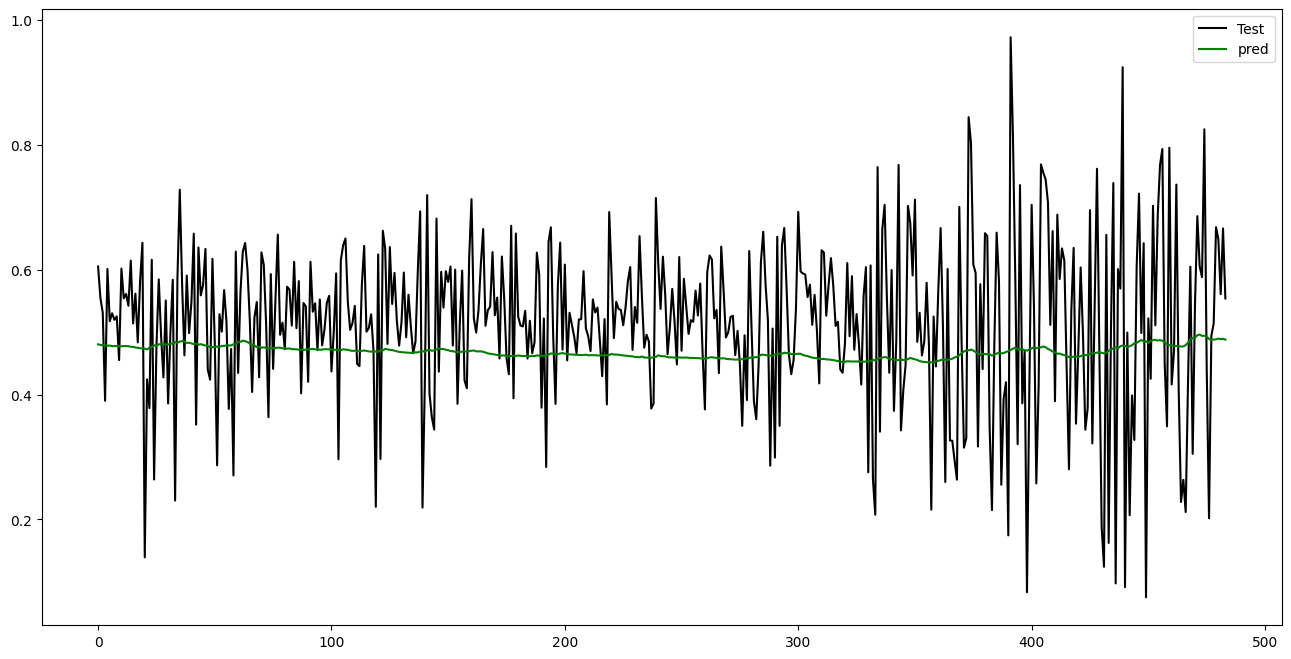

In [10]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()